# 1. Importar todas las librerías necesarias. (+0.15 puntos)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

# 2. Inicializar algunas variables que después modificaremos. (+0.15 puntos)

In [ ]:
sistema_operativo = {
       "L" : 'Linux',
       'S' : 'Solaris',
       'A' : 'AIX',
       'H' : 'HP-UX'
  }
entorno = {
      'D' : 'Development',
      'I' : 'Integration',
      'T' : 'Testing',
      'S' : 'Staging',
      'P' : 'Production'
}
pais = {
      'NOR' : 'Norway',
      'FRA' : 'France',
      'ITA' : 'Italy',
      'SPA' : 'Spain',
      'DEU' : 'Germany',
      'IRL' : 'Ireland'
}
df = None
dataset = []
hostnames = []

# 3. Crear una función para generar los hostnames en base a unas reglas (+1.5 puntos)

In [ ]:
def set_hostnames(number_of_hosts : int) -> None:
  os_list = list(sistema_operativo.keys())
  en_list = list(entorno.keys())
  pa_list = list(pais.keys())
  secuencia = {}
  for i in range(number_of_hosts):

    OS = rd.choices(os_list, weights=(40,30,20,10), k=1)[0]
    EN = rd.choices(en_list, weights=(10,10,25,25,30), k=1)[0]
    PA = rd.choices(pa_list, weights=(6,9,16,16,23,30))[0]
    temporal = f"{OS}{EN}{PA}"

    if temporal in secuencia:
      secuencia[temporal] += 1
    else:
      secuencia[temporal] = 1

    unico_host = f"{temporal}{secuencia[temporal]:03}"
    hostnames.append(unico_host)

# 4. Crear una función para obtener el nombre del SO. (+0.5 puntos)

In [ ]:
def get_OS(hostname : str) -> str:
  sistema = hostname[0]
  if sistema in sistema_operativo:
    clave = sistema_operativo[sistema]
    return clave
  else:
    clave = 'Unknown'
    return clave

# 5. Crear una función para obtener el nombre del entorno. (+0.5 puntos)

In [ ]:
def get_environment(hostname : str) -> str:
  proceso = hostname[1]
  if proceso in entorno:
    clave = entorno[proceso]
    return clave
  else:
    clave = 'Unknown'
    return clave

# 6. Crear una función para obtener el nombre del país. (+0.5 puntos)

In [ ]:
def get_country(hostname : str) -> str:
  ubicacion = hostname[2:5]
  if ubicacion in pais:
    clave = pais[ubicacion]
    return clave
  else:
    clave = 'Unknown'
    return clave

# 7. Crear una función para generar el DataFrame. (+1 punto)

In [ ]:
def set_dataframe(count: int) -> None:
  global df

  set_hostnames(count)
  for categoria in hostnames:
    dataset.append({
        'hostname' : categoria,
        'os' : get_OS(categoria),
        'environment' : get_environment(categoria),
        'country' : get_country(categoria),
        'node' : int(categoria[-3:])
    })

  df = pd.DataFrame(dataset)

# 8. Crear el DataFrame. (+0.2 puntos)

In [ ]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,LPITA001,Linux,Production,Italy,1
1,SPIRL001,Solaris,Production,Ireland,1
2,SIIRL001,Solaris,Integration,Ireland,1
3,LIITA001,Linux,Integration,Italy,1
4,LTDEU001,Linux,Testing,Germany,1
...,...,...,...,...,...
1495,ATDEU010,AIX,Testing,Germany,10
1496,APIRL029,AIX,Production,Ireland,29
1497,LTFRA014,Linux,Testing,France,14
1498,STNOR010,Solaris,Testing,Norway,10


# 9. Guardar el DataFrame generado en un fichero CSV. (+0.5 puntos)

In [ ]:
df.to_csv(
    'hosts.csv',
    header = True,
    index = False
)

hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,LPITA001,Linux,Production,Italy,1
1,SPIRL001,Solaris,Production,Ireland,1
2,SIIRL001,Solaris,Integration,Ireland,1
3,LIITA001,Linux,Integration,Italy,1
4,LTDEU001,Linux,Testing,Germany,1
...,...,...,...,...,...
1495,ATDEU010,AIX,Testing,Germany,10
1496,APIRL029,AIX,Production,Ireland,29
1497,LTFRA014,Linux,Testing,France,14
1498,STNOR010,Solaris,Testing,Norway,10


# 10. Generar un único gráfico, agrupando para cada país (country) los entornos (environment). (+0.5 puntos)

<Axes: xlabel='country'>

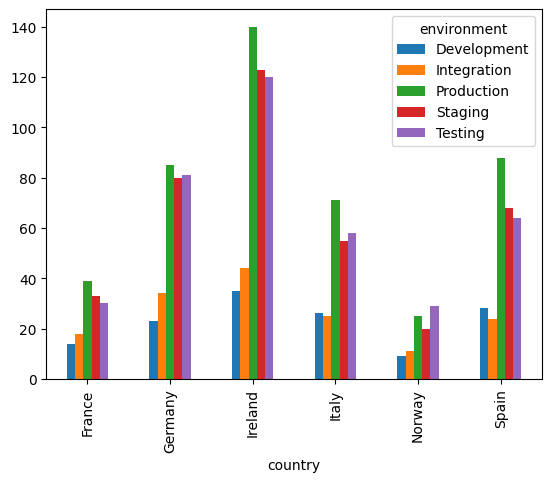

In [ ]:
grafico = df.groupby(['country', 'environment']).size()
grafico.unstack().plot(kind='bar')

# 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas. (+4.5 puntos)

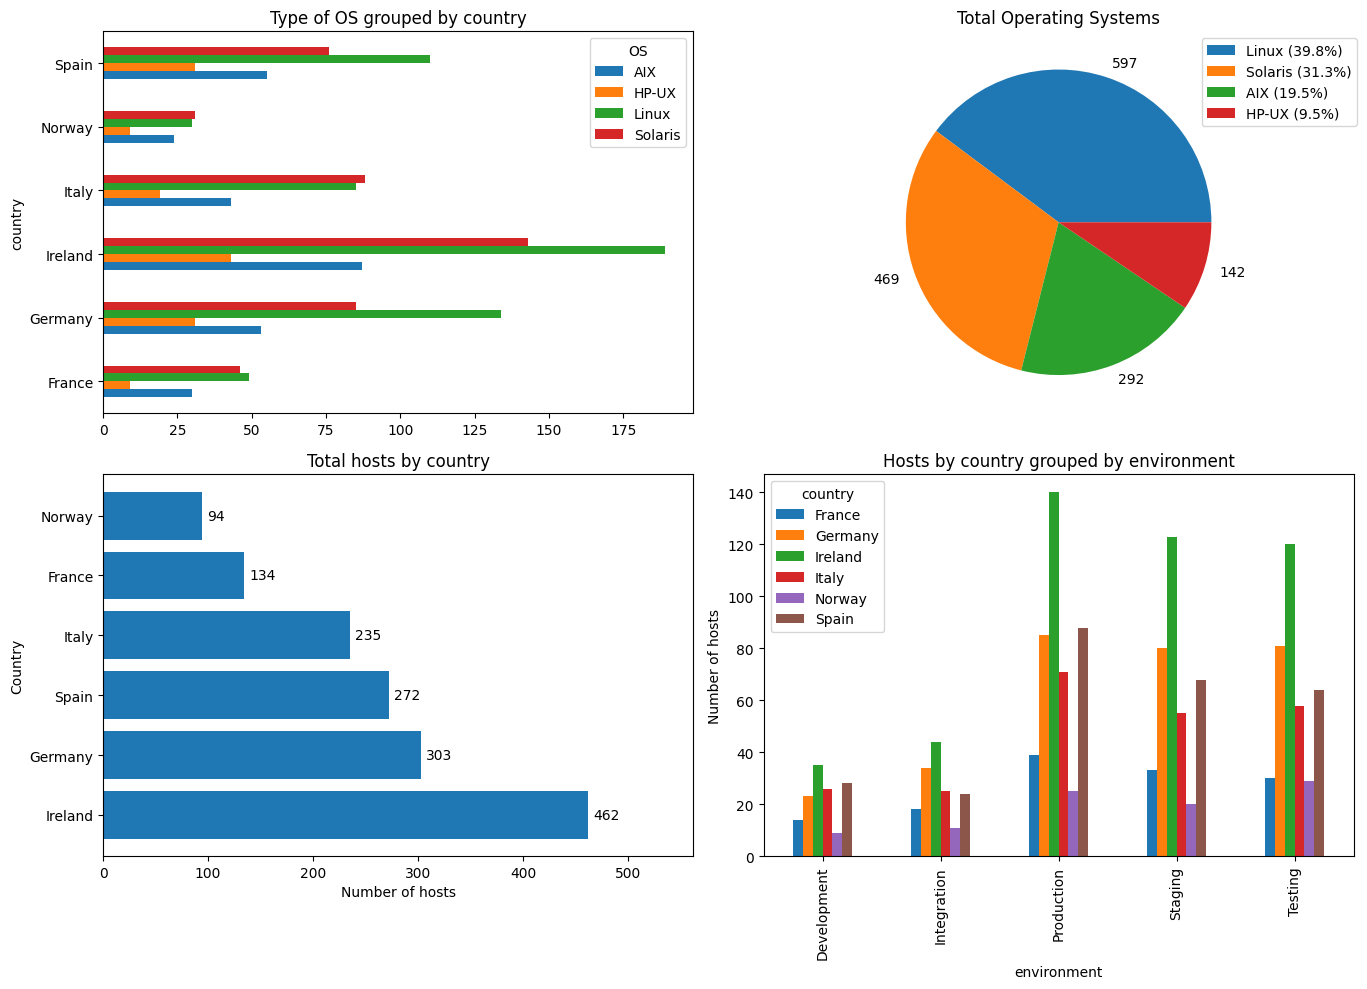

In [94]:
fig, axs = plt.subplots(2, 2, figsize = (14,10))

#grafico 1: Barras horizontales

type_os = df.groupby(['country', 'os']).size().unstack()
type_os.plot(kind = 'barh', ax=axs[0,0])
axs[0,0].set_title('Type of OS grouped by country')
axs[0,0].legend(
    loc = 'upper right',
    title = 'OS'
)

#grafico 2: Pie Chart

total_os = df['os'].value_counts()
porcentaje = (total_os/total_os.sum()) * 100
legend_labels = [f'{os_type} ({pct:.1f}%)' for os_type, pct in zip(total_os.index, porcentaje)]
axs[0,1].pie(total_os, labels=total_os.values)
axs[0,1].set_title('Total Operating Systems')
axs[0,1].legend(
    legend_labels,
    loc = 'best',
    bbox_to_anchor=(0.8, 0.5, 0.5, 0.5)
)

#grafico 3: Barras horizontales

total_hosts = df['country'].value_counts()
max_valor = total_hosts.max()
margen = 100
axs[1,0].barh(total_hosts.index, total_hosts.values)
axs[1,0].set_xlim(0,max_valor + margen)
axs[1,0].set_title('Total hosts by country')
axs[1,0].set_xlabel('Number of hosts')
axs[1,0].set_ylabel('Country')
for i, v in enumerate(total_hosts.values):
  axs[1,0].text(v +5, i, str(v), va = 'center')

#grafico 4: Barras

hosts_country = df.groupby(['environment', 'country']).size().unstack()
hosts_country.plot(kind = 'bar', ax=axs[1,1])
axs[1,1].set_title('Hosts by country grouped by environment')
axs[1,1].set_ylabel('Number of hosts')

fig.tight_layout()